# Cloud Faculty Institute Workshop: Predict Diabetes from Medical Records

## Overview
This project involves participating in a Kaggle competition aimed at predicting diabetes based on medical records. The dataset is derived from the National Institute of Diabetes and Digestive and Kidney Diseases, with the goal of diagnostically predicting whether a patient has diabetes based on specific diagnostic measurements.

## Dataset Description

### Context
The dataset consists of medical records from female patients who are at least 21 years old and of Pima Indian heritage. The primary objective is to predict the onset of diabetes using various medical predictor variables.

### Content
The dataset includes several predictor variables and one target variable, `Outcome`. The predictor variables include:
- `Pregnancies`: Number of pregnancies the patient has had
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)^2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1) indicating whether the patient has diabetes (1) or not (0)

### Files
- `train.csv`: The training dataset containing the predictor variables and the target variable.
- `test.csv`: The test dataset containing the predictor variables but not the target variable.
- `sample_submission.csv`: A sample submission file in the correct format for predictions.

## Acknowledgements
The dataset was referenced from:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Objective
The challenge is to build a machine learning model that can accurately predict whether or not the patients in the test dataset have diabetes. This involves exploring the data, preprocessing it, selecting appropriate models, and fine-tuning them to achieve the best performance.

In [21]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading the dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,1,89,66,23,94,28.1,0.167,21,0,3
3,0,137,40,35,168,43.1,2.288,33,1,4
4,5,116,74,0,0,25.6,0.201,30,0,5


In [8]:
# Do we need to input any missing data?
train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Id                          0
dtype: int64

## Data Preprocessing and Model Training

In this section, we will perform several key steps to prepare the data and train our first machine learning model, a K-Nearest Neighbors (KNN) classifier. The following steps are included:

1. **Dropping Unnecessary Columns**:
   - We will drop the `Id` column from the training dataset as it does not provide any useful information for predicting diabetes.

2. **Data Splitting**:
   - We will split the training data into training and testing sets. This helps us to evaluate the model on unseen data and get an estimate of its performance.
   - We use `train_test_split` with stratification to ensure that the distribution of the target variable (`Outcome`) is the same in both the training and testing sets.

3. **Feature Normalization**:
   - We will normalize the feature values using `StandardScaler`. Normalization scales the features to have zero mean and unit variance, which is important for distance-based algorithms like KNN.

4. **Training the KNN Model**:
   - We will initialize and train a K-Nearest Neighbors classifier with `n_neighbors=5`.
   - The model will be trained on the normalized training data.

5. **Model Evaluation**:
   - We will evaluate the model's performance on the test set by calculating its accuracy.
   - Additionally, we will print the confusion matrix and classification report to get a detailed understanding of the model's performance in terms of precision, recall, and F1-score.


In [9]:
# Data Preprocessing
X = train.drop(columns=['Id', 'Outcome'])
y = train['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

# KNN Model
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)


# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

print("KNN Model Evaluation:")
evaluate_model(knn, X_train, X_test, y_train, y_test)

KNN Model Evaluation:
Accuracy: 0.7872340425531915
Confusion Matrix:
 [[77 14]
 [16 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        91
           1       0.71      0.68      0.69        50

    accuracy                           0.79       141
   macro avg       0.77      0.76      0.77       141
weighted avg       0.79      0.79      0.79       141



#### Accuracy
- **0.8014**: The model correctly predicts 80.14% of the cases.

#### Confusion Matrix
- **True Negatives (TN)**: 77
- **False Positives (FP)**: 14
- **False Negatives (FN)**: 16
- **True Positives (TP)**: 34

### Classification Report

##### Class 0 (No Diabetes)
- **Precision**: 0.83
- **Recall**: 0.85
- **F1-Score**: 0.84

##### Class 1 (Diabetes)
- **Precision**: 0.71
- **Recall**: 0.68
- **F1-Score**: 0.69

The model achieves good overall accuracy (78%). It performs better in predicting the absence of diabetes (class 0) than the presence of diabetes (class 1). Further tuning can help improve these results.

### What if we categorize BMI?

In [10]:
# Data Preprocessing with BMI Categorization
train_with_cat = train.drop(columns=['Id'])
train_with_cat['BMI_Category'] = pd.cut(train_with_cat['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], 
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
train_with_cat = pd.get_dummies(train_with_cat, columns=['BMI_Category'], drop_first=True)
train_with_cat.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,6,148,72,35,0,33.6,0.627,50,1,0,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0
2,1,89,66,23,94,28.1,0.167,21,0,0,1,0
3,0,137,40,35,168,43.1,2.288,33,1,0,0,1
4,5,116,74,0,0,25.6,0.201,30,0,0,1,0


In [11]:
X_with_cat = train_with_cat.drop(columns=['Outcome', 'BMI'])
scaler = StandardScaler()
X_with_cat_scaled = scaler.fit_transform(X_with_cat)

X_train_with_cat, X_test_with_cat, y_train, y_test = train_test_split(X_with_cat_scaled, y, stratify=y, random_state=42)

# KNN Model with BMI Categorization
knn_with_cat = KNN(n_neighbors=5)
knn_with_cat.fit(X_train_with_cat, y_train)

print("KNN Model (with BMI Cat) Evaluation:")
evaluate_model(knn_with_cat, X_train_with_cat, X_test_with_cat, y_train, y_test)

KNN Model (with BMI Cat) Evaluation:
Accuracy: 0.7943262411347518
Confusion Matrix:
 [[78 13]
 [16 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        91
           1       0.72      0.68      0.70        50

    accuracy                           0.79       141
   macro avg       0.78      0.77      0.77       141
weighted avg       0.79      0.79      0.79       141



The updated model achieves an accuracy of 79.43%, which is similar to the original model. The results suggest that categorizing BMI did not significantly improve the model's performance.

### Trying XGboost

In [13]:
feature_names = X.columns.tolist()
xgb_no_cat = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
xgb_no_cat.fit(X_train, y_train)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_no_cat, X_train, X_test, y_train, y_test)


XGBoost Model Evaluation:
Accuracy: 0.8297872340425532
Confusion Matrix:
 [[77 14]
 [10 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        91
           1       0.74      0.80      0.77        50

    accuracy                           0.83       141
   macro avg       0.81      0.82      0.82       141
weighted avg       0.83      0.83      0.83       141



In [14]:
feature_names_cat = X_with_cat.columns.tolist()

xgb_with_cat = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
xgb_with_cat.fit(X_train_with_cat, y_train)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_with_cat, X_train_with_cat, X_test_with_cat, y_train, y_test)


XGBoost Model Evaluation:
Accuracy: 0.7801418439716312
Confusion Matrix:
 [[73 18]
 [13 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        91
           1       0.67      0.74      0.70        50

    accuracy                           0.78       141
   macro avg       0.76      0.77      0.76       141
weighted avg       0.79      0.78      0.78       141



In [17]:
def evaluate_model_further(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_pred_proba)
    }

print("KNN without BMI categories:", evaluate_model_further(knn, X_test, y_test))
print("KNN with BMI categories:", evaluate_model_further(knn_with_cat, X_test_with_cat, y_test))
print("XGBoost without BMI categories:", evaluate_model_further(xgb_no_cat, X_test, y_test))
print("XGBoost with BMI categories:", evaluate_model_further(xgb_with_cat, X_test_with_cat, y_test))

KNN without BMI categories: {'accuracy': 0.7872340425531915, 'precision': 0.7083333333333334, 'recall': 0.68, 'f1': 0.6938775510204083, 'auc_roc': 0.8253846153846154}
KNN with BMI categories: {'accuracy': 0.7943262411347518, 'precision': 0.723404255319149, 'recall': 0.68, 'f1': 0.7010309278350516, 'auc_roc': 0.8507692307692307}
XGBoost without BMI categories: {'accuracy': 0.8297872340425532, 'precision': 0.7407407407407407, 'recall': 0.8, 'f1': 0.7692307692307692, 'auc_roc': 0.8720879120879121}
XGBoost with BMI categories: {'accuracy': 0.7801418439716312, 'precision': 0.6727272727272727, 'recall': 0.74, 'f1': 0.7047619047619048, 'auc_roc': 0.854065934065934}


In [142]:
y_pred_knn_no_cat = knn.predict(X_test)
y_pred_knn_with_cat = knn_with_cat.predict(X_test_with_cat)
y_pred_xgb_no_cat = xgb_no_cat.predict(X_test)
y_pred_xgb_with_cat = xgb_with_cat.predict(X_test_with_cat)

In [22]:
# 10. Cross-Validation Comparison
print("KNN CV scores without BMI categories:", cross_val_score(knn, X_scaled, y, cv=5).mean())
print("KNN CV scores with BMI categories:", cross_val_score(knn_with_cat, X_with_cat_scaled, y, cv=5).mean())
print("XGBoost CV scores without BMI categories:", cross_val_score(xgb_no_cat, X_scaled, y, cv=5).mean())
print("XGBoost CV scores with BMI categories:", cross_val_score(xgb_with_cat, X_with_cat_scaled, y, cv=5).mean())

KNN CV scores without BMI categories: 0.7415139064475347
KNN CV scores with BMI categories: 0.7415455120101138
XGBoost CV scores without BMI categories: 0.7433154235145386
XGBoost CV scores with BMI categories: 0.7201801517067004


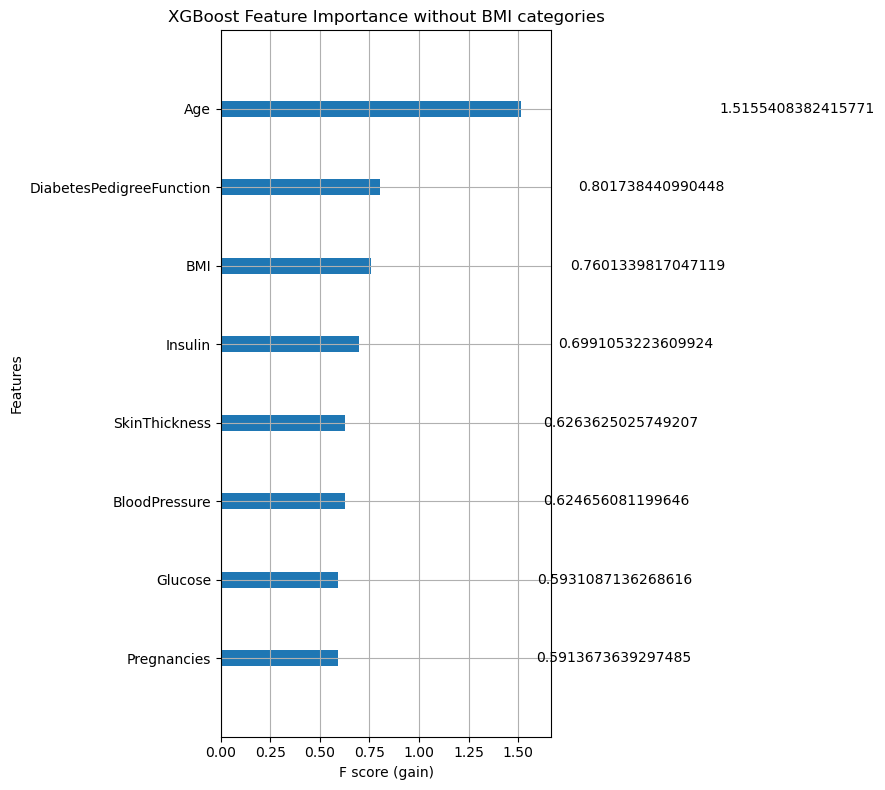

In [23]:
#Feature Importance Analysis (for XGBoost)
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_no_cat, importance_type='gain', show_values=True, ax=ax)
ax.set_yticklabels(feature_names)
plt.title("XGBoost Feature Importance without BMI categories")
plt.xlabel('F score (gain)')
plt.tight_layout()
plt.show()

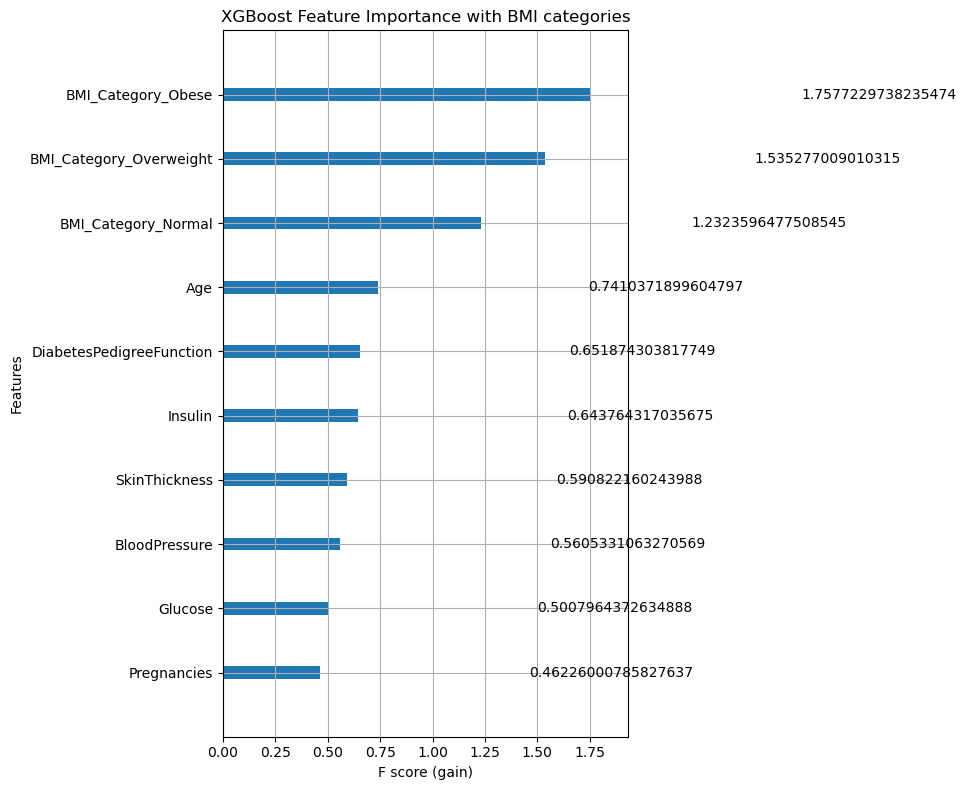

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_with_cat, importance_type='gain', show_values=True, ax=ax)
ax.set_yticklabels(feature_names_cat)
plt.title("XGBoost Feature Importance with BMI categories")
plt.xlabel('F score (gain)')
plt.tight_layout()
plt.show()

In [25]:
# 12. Correlation Analysis
correlation_with_cat = train_with_cat[['BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese', 'Outcome']].corr()['Outcome'].drop('Outcome')
correlation_without_cat = train[['BMI', 'Outcome']].corr()['Outcome'].drop('Outcome')

print("Correlation with BMI categories:\n", correlation_with_cat)
print("Correlation with original BMI:\n", correlation_without_cat)

Correlation with BMI categories:
 BMI_Category_Normal       -0.246610
BMI_Category_Overweight   -0.140126
BMI_Category_Obese         0.311020
Name: Outcome, dtype: float64
Correlation with original BMI:
 BMI    0.286838
Name: Outcome, dtype: float64


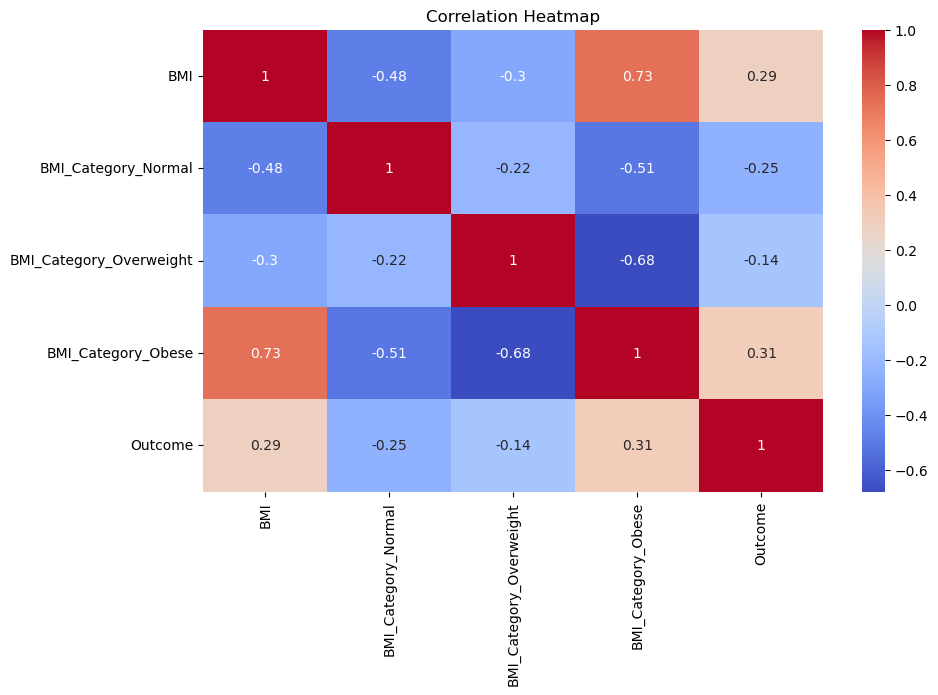

In [26]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(train_with_cat[['BMI', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese', 'Outcome']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

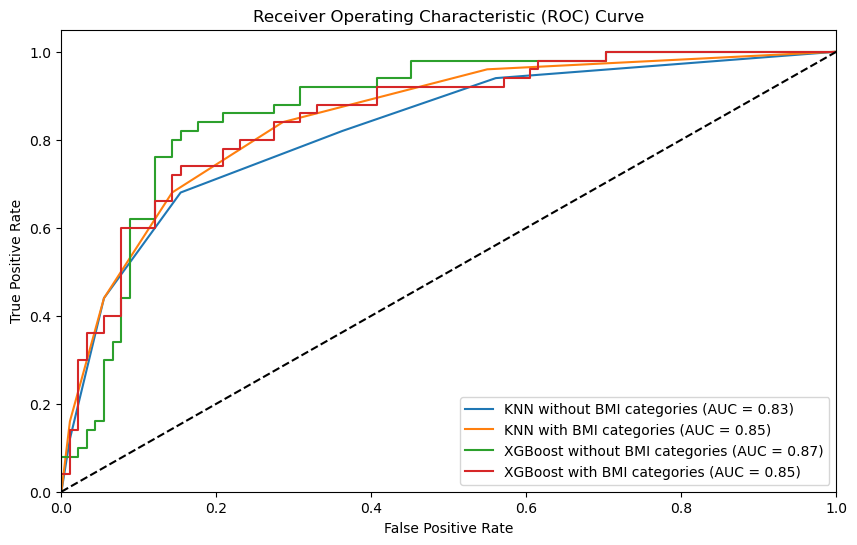

In [27]:
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 6))
plot_roc_curve(knn, X_test, y_test, 'KNN without BMI categories')
plot_roc_curve(knn_with_cat, X_test_with_cat, y_test, 'KNN with BMI categories')
plot_roc_curve(xgb_no_cat, X_test, y_test, 'XGBoost without BMI categories')
plot_roc_curve(xgb_with_cat, X_test_with_cat, y_test, 'XGBoost with BMI categories')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X_scaled, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))


   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.280749         0.053118         0.301248        0.037135
1          0.216578         0.015743         0.254902        0.024048
2          0.198752         0.005494         0.244207        0.010988
3          0.186275         0.010988         0.233512        0.005042
4          0.173797         0.002183         0.228164        0.006670
0.7718360071301248


In [29]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.857013       0.005929       0.786429      0.017500
1        0.883520       0.004616       0.813747      0.016355
2        0.899829       0.004584       0.839066      0.009721
3        0.907474       0.005260       0.842458      0.015115
4        0.913053       0.003412       0.840706      0.014100
0.8407061549253482
